<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-03-01-non-linear-humped-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1. Humped Curves

Humped curves, also known as unimodal curves, are characterized by a single peak or "hump" and are commonly used to describe phenomena where a variable increases to a maximum point and then decreases. These types of curves are often found in various fields such as biology, economics, and environmental science.

Some common types of humped curves include:

1.  **Gaussian (Normal) Distribution**: A symmetric bell-shaped curve that is widely used in statistics to represent the distribution of a set of data.

2.  **Log-Normal Distribution**: A distribution of a random variable whose logarithm is normally distributed, often used in finance and environmental studies.

3.  **Beta Distribution**: A family of continuous probability distributions defined on the interval \[0, 1\], often used to model random variables that are constrained within a fixed range.

4.  **Ricker Curve**: A population growth model used in ecology to describe the growth of populations, characterized by rapid growth followed by a decline as the population approaches a carrying capacity.

5.  **First-order Compartment**: A model in pharmacokinetics where the rate of change of drug concentration is proportional to the concentration of the drug.

6.  **Biexponential Humped Curves**: A curve with two exponential terms that describe a rapid initial decline followed by a slower decline.



### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314977 sha256=a97c16cab1d3044c71e74a78de1129c39c67ea22d7a390d0115f3174bb088b62
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fit Different types of Humped Curves in R

We will fit different humped curves to a sample dataset in R using the `fitdistrplus` package. The `fitdistrplus` package provides functions to fit various probability distributions to data and estimate the parameters of the distributions.

### Install Rrequired R Packages

In [3]:
%%R
packages <- c(
  "tidyverse",    # Includes readr, dplyr, ggplot2, etc.
  'fitdistrplus', # Fit distributions
  'minpack.lm'    # Levenberg-Marquardt algorithm
)


In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
   tidyverse fitdistrplus   minpack.lm 
        TRUE         TRUE         TRUE 


### Load R Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:minpack.lm"   "package:fitdistrplus" "package:survival"    
 [4] "package:MASS"         "package:lubridate"    "package:forcats"     
 [7] "package:stringr"      "package:dplyr"        "package:purrr"       
[10] "package:readr"        "package:tidyr"        "package:tibble"      
[13] "package:ggplot2"      "package:tidyverse"    "package:tools"       
[16] "package:stats"        "package:graphics"     "package:grDevices"   
[19] "package:utils"        "package:datasets"     "package:methods"     
[22] "package:base"        


### Gaussian (Normal) Curve

The Gaussian or Normal distribution is one of the most commonly used probability distributions in statistics. It is characterized by its symmetric bell-shaped curve and is defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). The probability density function (PDF) of the Gaussian distribution is given by:

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right) $$

Where:

-   $x$ is the variable.
-   $\mu$ is the mean of the distribution.
-   $\sigma$ is the standard deviation of the distribution.
-   $\exp$ denotes the exponential function.


***Properties of the Gaussian Distribution**:

1.  **Symmetry**: The distribution is symmetric around the mean.
2.  **Mean, Median, Mode**: For a normal distribution, the mean, median, and mode are all equal.
3.  **68-95-99.7 Rule**: Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

**Applications of the Gaussian Distribution**

1.  **Statistical Analysis**: Used in hypothesis testing, confidence intervals, and regression analysis.
2.  **Natural Phenomena**: Models natural phenomena such as heights, blood pressure, and test scores.
3.  **Finance**: Used in stock price modeling and risk assessment.
4.  **Quality Control**: Applied in processes to monitor and control variations.

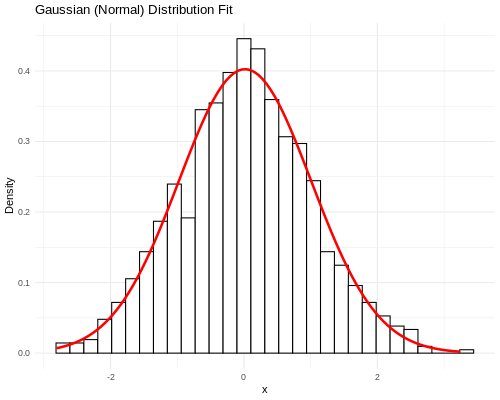

In [13]:
%%R -w 500 -h 400 -u px
# Generate synthetic data from a normal distribution
set.seed(123)
mu <- 0    # mean
sigma <- 1 # standard deviation
data <- rnorm(1000, mean = mu, sd = sigma)

# Create a data frame
df <- data.frame(x = data)

# Fit the Gaussian model to the data
fit <- fitdistrplus::fitdist(data, "norm")

# Get the summary of the fit
summary(fit)

# Plot the original data and the fitted Gaussian distribution
ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "white") +
  stat_function(fun = dnorm, args = list(mean = fit$estimate[1], sd = fit$estimate[2]),
                color = "red", size = 1.2) +
  ggtitle("Gaussian (Normal) Distribution Fit") +
  xlab("x") + ylab("Density") +
  theme_minimal()

### Log-Normal Distribution

The log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. In other words, if $X$ is a random variable that is log-normally distributed, then $\log(X)$ follows a normal distribution.

**Probability Density Function (PDF)**

The probability density function (PDF) of a log-normal distribution is given by:

$$ f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\log(x) - \mu)^2}{2\sigma^2}\right) $$

Where: - $x > 0$ - $\mu$ is the mean of the logarithm of the variable. - $\sigma$ is the standard deviation of the logarithm of the variable. - $\exp$ denotes the exponential function.

**Properties of the Log-Normal Distribution**

1.  **Positivity**: The log-normal distribution is defined only for positive values of $x$.
2.  **Skewness**: The distribution is positively skewed (right-skewed).
3.  **Mean and Variance**:
    -   Mean: $\exp(\mu + \sigma^2 / 2)$
    -   Variance: $(\exp(\sigma^2) - 1) \exp(2\mu + \sigma^2)$

**Applications of the Log-Normal Distribution**

1.  **Finance**: Used to model stock prices and financial returns.
2.  **Environmental Studies**: Applied in modeling the distribution of pollutant concentrations.
3.  **Biology**: Used to describe the distribution of sizes of living organisms.
4.  **Reliability Engineering**: Models the time to failure of products.


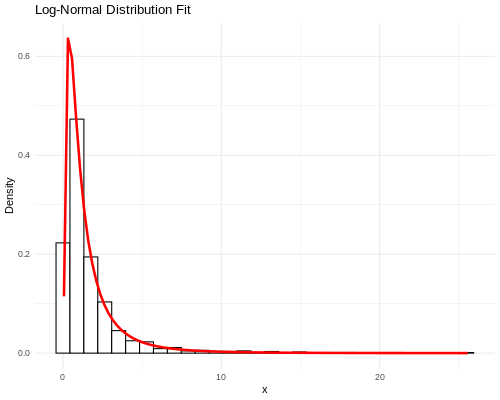

In [14]:
%%R -w 500 -h 400 -u px
# Generate synthetic data from a log-normal distribution
set.seed(123)
meanlog <- 0    # mean of the logarithm
sdlog <- 1      # standard deviation of the logarithm
data <- rlnorm(1000, meanlog = meanlog, sdlog = sdlog)

# Create a data frame
df <- data.frame(x = data)

# Fit the log-normal model to the data
fit <- fitdistrplus::fitdist(data, "lnorm")

# Get the summary of the fit
summary(fit)

# Plot the original data and the fitted log-normal distribution
ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "white") +
  stat_function(fun = dlnorm, args = list(meanlog = fit$estimate[1], sdlog = fit$estimate[2]),
                color = "red", size = 1.2) +
  ggtitle("Log-Normal Distribution Fit") +
  xlab("x") + ylab("Density") +
  theme_minimal()

### Beta Distribution

The Beta distribution is a continuous probability distribution defined on the interval $[0, 1]$. It is parameterized by two positive shape parameters, $\alpha$ (alpha) and $\beta$ (beta), which determine the shape of the distribution.

**Probability Density Function (PDF)**

The probability density function (PDF) of the Beta distribution is given by:

$$ f(x; \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} $$


Where:

- $x$ is the variable, and $0 \leq x \leq 1$.

- \$\alpha \> 0 is the first shape parameter.

3- $\beta > 0$ is the second shape parameter.

- $B(\alpha, \beta)$ is the Beta function, defined as:

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt $$

**Properties of the Beta Distribution**

1.  **Support**: The Beta distribution is defined on the interval $[0, 1]$.
2.  **Shape Flexibility**: By varying $\alpha$ and $\beta$, the Beta distribution can take on a wide variety of shapes.
3.  **Mean and Variance**:
    -   Mean: $\frac{\alpha}{\alpha + \beta}$)
    -   Variance: $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

**Applications of the Beta Distribution**

1.  **Bayesian Statistics**: Used as a prior distribution for binomial proportions.
2.  **Project Management**: Applied in PERT (Program Evaluation and Review Technique) for modeling task completion times.
3.  **Biology**: Models the distribution of allele frequencies in populations.
4.  **Quality Control**: Used to model the proportion of defective items in a batch.

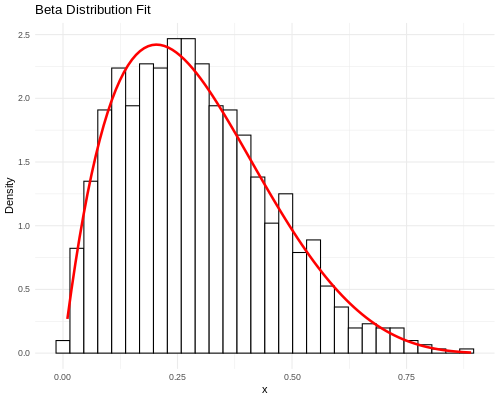

In [15]:
%%R -w 500 -h 400 -u px
# Generate synthetic data from a beta distribution
set.seed(123)
shape1 <- 2    # alpha
shape2 <- 5    # beta
data <- rbeta(1000, shape1 = shape1, shape2 = shape2)

# Create a data frame
df <- data.frame(x = data)

# Fit the beta model to the data
fit <- fitdistrplus::fitdist(data, "beta", start = list(shape1 = 1, shape2 = 1))

# Get the summary of the fit
summary(fit)

# Plot the original data and the fitted beta distribution
ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "white") +
  stat_function(fun = dbeta, args = list(shape1 = fit$estimate[1], shape2 = fit$estimate[2]),
                color = "red", size = 1.2) +
  ggtitle("Beta Distribution Fit") +
  xlab("x") + ylab("Density") +
  theme_minimal()

### Exponential Ricker Curve

The Ricker curve is used in population dynamics and is named after the Canadian biologist William Ricker. The Ricker curve describes how a population grows rapidly when it is small and slows as it approaches the carrying capacity. It is represented by the equation:

$$ N_{t+1} = N_t e^{r(1 - \frac{N_t}{K})} $$


Where:

- $N_t$ is the population size at time $t$.

- $r$ is the intrinsic growth rate.

- $K$ is the carrying capacity of the environment.

The Ricker model is a classic example of a discrete-time population model used in ecology to describe the growth of populations. It captures the idea that populations grow rapidly when they are small and slow down as they approach a carrying capacity. The mathematical formulation of the Ricker model is as follows:

1.  **Population Size** $N_t$:
    -   This represents the population size at the current time step $t$.
2.  **Exponential Growth Term** $e^{r(1 - \frac{N_t}{K})}$:
    -   $r$ (intrinsic growth rate) determines how fast the population grows when it is far from the carrying capacity.
    -   $\frac{N_t}{K}$ is the ratio of the current population size to the carrying capacity.
    -   $1 - \frac{N_t}{K}$ represents the effect of density dependence, which slows down growth as the population size increases.

**Interpretation**

-   When the population size $N_t$ is much smaller than the carrying capacity $K$, the term $( 1 - \frac{N_t}{K}$\$ is close to 1, and the population grows approximately exponentially.
-   As $N_t$ approaches $K$, the term $1 - \frac{N_t}{K}$ approaches 0, slowing the growth rate.
-   If $N_t$ exceeds $K$, the term $1 - \frac{N_t}{K}$ becomes negative, leading to a decrease in the population size.

Let's implement the Ricker model in R and visualize the population growth over time. We will simulate the population dynamics using the Ricker curve and plot the population size over time.



In [16]:
%%R
##Ricker Curve
ricker_curve <- function(t, r = 1.5, K = 100, N0 = 10) {
  N <- numeric(length(t))
  N[1] <- N0
  for (i in 2:length(t)) {
    N[i] <- N[i-1] * exp(r * (1 - N[i-1] / K))
  }
  return(N)
}

t_seq <- seq(0, 20, by = 1)
N_values <- ricker_curve(t_seq)
N_values

 [1]  10.00000  38.57426  96.92827 101.49882  99.24235 100.37665  99.81115
 [8] 100.09429  99.95282 100.02358  99.98821 100.00590  99.99705 100.00147
[15]  99.99926 100.00037  99.99982 100.00009  99.99995 100.00002  99.99999


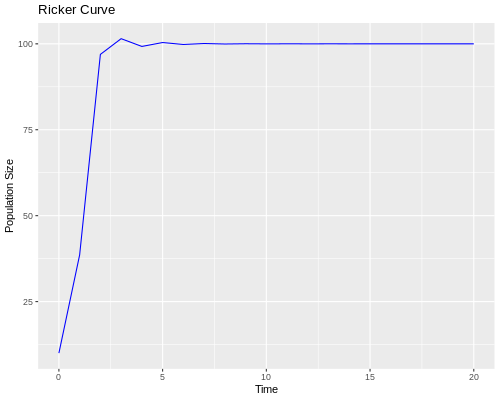

In [17]:
%%R -w 500 -h 400 -u px
# plot the Ricker curve
df_ricker <- data.frame(t = t_seq, N = N_values)
ggplot(df_ricker, aes(x = t, y = N)) +
  geom_line(color = "blue") +
  labs(title = "Ricker Curve", x = "Time", y = "Population Size")

### First-order Compartment

In pharmacokinetics, a first-order compartment refers to a model where the rate of change of the drug concentration in the compartment is proportional to the concentration of the drug. This is described by the equation:

$$ \frac{dC}{dt} = -kC $$#### Create x and y

Where:
- $C$ is the concentration of the drug
- $k$ is the first-order rate constant

This model assumes that the drug is uniformly distributed within the compartment and that the rate of elimination or absorption follows first-order kinetics.

Lest fit the first-order compartment model to a sample dataset in R:


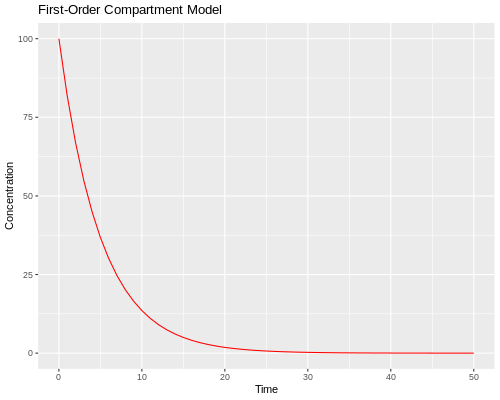

In [18]:
%%R -w 500 -h 400 -u px
# 2. First-Order Compartment Model
first_order_comp <- function(t, C0 = 100, k = 0.2) {
  return(C0 * exp(-k * t))
}

t_seq <- seq(0, 50, by = 1)
C_values <- first_order_comp(t_seq)

df_first_order <- data.frame(t = t_seq, C = C_values)
ggplot(df_first_order, aes(x = t, y = C)) +
  geom_line(color = "red") +
  labs(title = "First-Order Compartment Model", x = "Time", y = "Concentration")

### Biexponential Humped Curves

Biexponential humped curves are used to describe pharmacokinetic profiles where the concentration-time data show two phases: a rapid initial decline followed by a slower decline. This can be modeled using a biexponential equation:

$$ C(t) = Ae^{-\alpha t} + Be^{-\beta t} $$

Where:

-   $C(t)$ is the concentration of the drug at time $t$
-   $A$ and $B$ are coefficients
-   $\alpha$ and $\beta$ are rate constants for the two phases

The "hump" in the curve indicates a period where the concentration decreases more slowly after the initial rapid decline.  These concepts are fundamental in fields such as ecology, pharmacokinetics, and mathematical biology, providing insights into population dynamics, drug distribution, and elimination processes.

Let's fit a biexponential humped curve to a sample dataset in R:

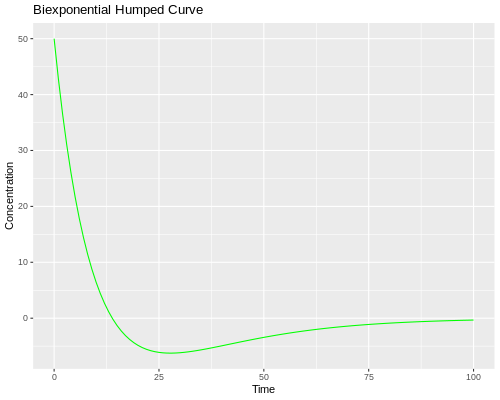

In [19]:
%%R -w 500 -h 400 -u px
# 3. Biexponential Humped Curve
biexponential_curve <- function(t, A = 100, B = 50, alpha = 0.1, beta = 0.05) {
  return(A * exp(-alpha * t) - B * exp(-beta * t))
}

t_seq <- seq(0, 100, by = 1)
C_values <- biexponential_curve(t_seq)

df_biexp <- data.frame(t = t_seq, C = C_values)
ggplot(df_biexp, aes(x = t, y = C)) +
  geom_line(color = "green") +
  labs(title = "Biexponential Humped Curve", x = "Time", y = "Concentration")


## Summary and Conclusions

In this notebook, we explored different types of humped curves and how to fit them to data in R using the `fitdistrplus` package. We covered the Gaussian (Normal) distribution, Log-Normal distribution, and Beta distribution, along with their properties and applications. Fitting probability distributions to data is a common task in statistics and data analysis, and it allows us to model and understand the underlying patterns in the data. We also discussed the Ricker curve, a population growth model used in ecology, and the first-order compartment model in pharmacokinetics.  By fitting humped curves to data, we can gain insights into the shape and characteristics of the data distribution, which can be useful for various analytical tasks.generalization performance.


## References

Here are some references on humped curves (specifically in the context of yield curves):

1.  [Humped Yield Curve: What it Means, How it Works, Types - Investopedia](https://www.investopedia.com/terms/h/humped-yield-curve.asp)
    -   This article explains what a humped yield curve is, how it works, and its different types.
2.  [Humped Yield Curve: Meaning, Functionality, and Types (Algo Trading)](https://paperswithbacktest.com/wiki/humped-yield-curve-meaning-functionality-types)
    -   This resource discusses the unique characteristics of humped yield curves and their implications for financial analysis.
3.  [What Is a Humped Yield Curve? - Finance Strategists](https://www.financestrategists.com/wealth-management/investment-management/humped-yield-curve/)
    -   This article describes the humped yield curve and its implications for the economy.
4.  [Humped Yield Curve: Definition, Examples, and Implications](https://www.supermoney.com/encyclopedia/humped-yield-curve)
    -   This resource provides a definition, examples, and the implications of a humped yield curve in the bond market.
5. [Ricker model - Wikipedia](https://en.wikipedia.org/wiki/Ricker_model)
6. [Ricker’s Population Model - LSU](https://www.math.lsu.edu/system/files/VK2%20Presentation.pdf)
7. [Fast real-time biexponential curve fitting - ScienceDirect](https://www.sciencedirect.com/science/article/pii/0010480980900385)
8. [Biexponential fitting (non-linear regression) on Matlab](https://www.mathworks.com/matlabcentral/answers/331245-biexponential-fitting-non-linear-regression-on-matlab)
